# Peak Finding of Star Sensor Angle Scan Calibration Data

Jonathan Bower   
Jonathan.bower@unh.edu

---

In [158]:
import pyMAP as pm
import pandas as pd
import bowPy as bp
%matplotlib notebook

In [206]:
loc = r'C:\Users\Jonny Woof\OneDrive - USNH\IMAP-Lo-box (1)\Science\Testing\IMAPlo_Cal\EM_StarSensor\EM_StarSensor_T001\Test Data\csv'
fil_old = 'EMSTR_T001_R032_M-1_EL+2.txt'
fil_new = 'EMSTR_T001_R039_M-1_EL-0.txt'
import os
df_old = pm.data.load(os.path.join(loc,fil_old),'strSen','EMstrSen').set_index('phi')
df_new = pm.data.load(os.path.join(loc,fil_new),'strSen','EMstrSen').set_index('phi')

Perform peak fitting, for each pmt voltage, quadrant angle and scan direction

In [218]:
fits = df_new.groupby(['v_pmt','scan_dir',df_new.index>0]).apply(lambda x: bp.Jonda(\
                                                            xy_data = np.stack([x.index,x['v_str']])))
fits.apply(lambda x: x.interp_xy(sigma = 10,kind = 'cubic'))

v_pmt  scan_dir       
-900   -1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
        1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
-850   -1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
        1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
-800   -1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
        1.0      False    <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
                 True     <bowPy.bowPy.Jonda.Jonda object at 0x000002383...
dtype: object

Plot the distributions and their cubic interpolations

<IPython.core.display.Javascript object>


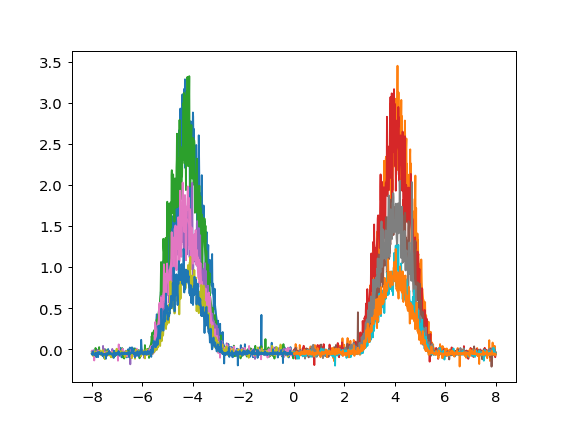

v_pmt  scan_dir       
-900   -1.0      False    None
                 True     None
        1.0      False    None
                 True     None
-850   -1.0      False    None
                 True     None
        1.0      False    None
                 True     None
-800   -1.0      False    None
                 True     None
        1.0      False    None
                 True     None
dtype: object

In [215]:
fig,ax = plt.subplots()
fits.apply(lambda x:x.show(ax = ax))

The resulting peak locations

In [219]:
fits.apply(lambda x: x.find_xy('peak'))

v_pmt  scan_dir       
-900   -1.0      False   -4.312877
                 True     4.094095
        1.0      False   -4.255424
                 True     3.979596
-850   -1.0      False   -4.201228
                 True     4.157125
        1.0      False   -4.290996
                 True     3.962712
-800   -1.0      False   -4.205149
                 True     4.080840
        1.0      False   -4.410485
                 True     3.974011
dtype: float64

Plot the peak location magnitude against pmt voltage 

<IPython.core.display.Javascript object>


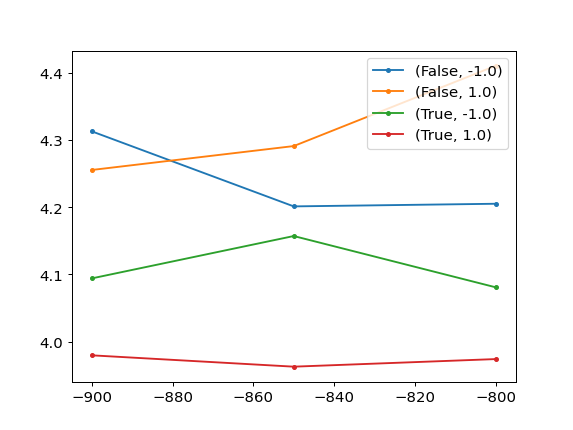

In [221]:
fig,ax = plt.subplots()
fits.apply(lambda x: x.find_xy('peak')).abs().reset_index().groupby(['level_2','scan_dir']).apply(\
                                                    lambda x: ax.plot(x['v_pmt'],x[0],'.-',label = x.name))
ax.legend()